### Clustering: k-means and linkage-based clustering

In this notebook we are going to practice with the k-means and the linkage-based (called "agglomerative" in sklearn) clustering algorithms.

In particular you are going to implement the k-means algorithm from scratch and to compare the results with the implementation already present in the sklearn library.

In [1]:
#load the required packages
%matplotlib inline  

import numpy as np
import scipy as sp
import imageio as imio
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from mpl_toolkits.mplot3d import Axes3D #3d plotting functions
from matplotlib import pyplot
from PIL import Image

from copy import deepcopy  #deepcopy ensures that a copy of all the object data is performed (not just the pointers)

## TO DO:
    
Place your ID number in the ID variable, it will be used as random seed (as usual the random seed can affect a little bit the results)

In [2]:
# fix your ID ("numero di matricola") and the seed for random generator
ID = 1183845  #insert your ID number here
np.random.seed(ID)

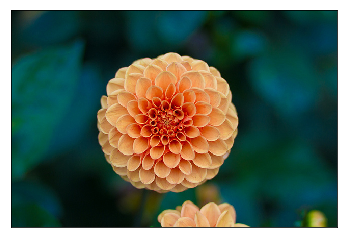

Flower image:  (427, 640, 3)


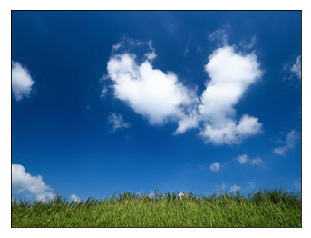

Landscape image:  (240, 320, 3)


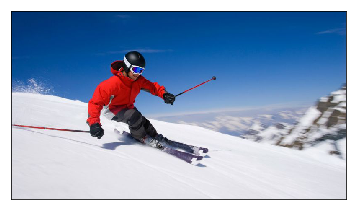

Skiing image:  (451, 800, 3)


In [3]:
# load the images and display them
flower = load_sample_image('flower.jpg')
landscape = imio.imread("data/landscape.jpg")
skiing = imio.imread("data/skiing.jpg")

ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)
plt.show()
print("Flower image: ",flower.shape)

ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(landscape)
plt.show()
print("Landscape image: ",landscape.shape)

ax3 = plt.axes(xticks=[], yticks=[])
ax3.imshow(skiing)
plt.show()
print("Skiing image: ",skiing.shape)

We are going to start by using the flower image. It will be rescaled of a factor 8 to speed up the computation.


(53, 80, 3)


/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


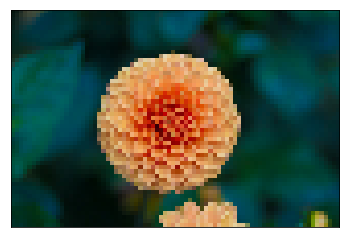

In [4]:
# Rescale the image of a factor of 8
# The anti-aliasing can be enabled for better performances but requires a recent version of the python packages

#flower_rescaled = rescale(flower, 1.0 / 8.0, anti_aliasing=True, multichannel=True) #new versions
flower_rescaled = rescale(flower, 1.0 / 8.0)  # better compatibility

# Firstly, we are going to visualize the rescaled version
print(flower_rescaled.shape)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower_rescaled);

In [5]:
# reshape the data to a matrix of num_pixels x 3

data_rescaled = flower_rescaled.reshape(flower_rescaled.shape[0]*flower_rescaled.shape[1], 3)

print(data_rescaled.shape)
print(data_rescaled)

(4240, 3)
[[0.02064373 0.08338883 0.05812061]
 [0.05490196 0.11372549 0.09411765]
 [0.12341842 0.17047725 0.14890862]
 ...
 [0.16056234 0.27243803 0.05882353]
 [0.02560118 0.17946726 0.0745098 ]
 [0.01590825 0.17162412 0.09411765]]


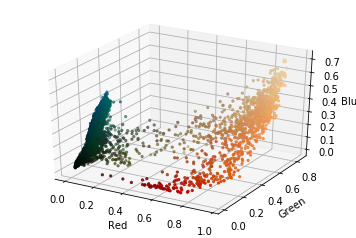

In [6]:
# Plot the points in the 3-dimensional space with normalized intervals between 0 and 1
# (corresponding to the three channels of the image, i.e. Red Green and Blue)



fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
r, g, b = list(data_rescaled[:,0]), list(data_rescaled[:,1]), list(data_rescaled[:,2])

axis.scatter(r, g, b, c=data_rescaled, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

## TO DO 1
Implement the k-means algorithm manually (do not use the kmeans function of sklearn). The inputs to the function is the set of vectors to be clustered and the number of clusters. The output must contain the clusters barycenters, a vector associating each data point to the corresponding cluster and the error at each iteration.
Additionally, fix a maximum number of iterations of the k-means algorithm (e.g., 50).

In [7]:
def my_kmeans(points, k):
    max_iters=50
    n_points=points.shape[0]
    dim=points.shape[1]
    
    rand_index = np.random.randint(0, n_points, k)
    
    centroids=np.zeros((k,dim))
    for i in range(k):
        centroids[i]=points[rand_index[i]]
    
    clusters=np.zeros(n_points)
    error=np.zeros(max_iters)
    
    for t in range(max_iters):
        err=0
        
        for i in range(n_points):
            big_value=1e9
            index=-1
            
            for j in range(k):
                vector=np.linalg.norm(points[i,:]-centroids[j,:]) #numpy distance
                if vector<big_value:
                    big_value=vector
                    index=j
                    
            clusters[i]=index
            err+=big_value**2
            
        error[t]=err #stores the error for each iteration
        
        #STOPPING CONDITIONS
        if t == max_iters-1:
            print("The function stopped at iteration "+str(t+1)+".")
            break
        
        if t > 0 and error[t] == error[t-1]:
            print("The function stopped at iteration "+str(t+1)+".")            
            error.resize(t)
            break
        
        #update centroids
        for i in range(k):
            tot=0
            cnt=0
            
            for j in range(n_points):
                if clusters[j] == i:
                    tot += points[j]
                    cnt += 1
            # update centroid
            centroids[i] = tot / cnt
        
        
    return centroids, clusters, error

## TO DO 2:

Now try the function you developed on the flower image with two clusters (k=2). 

Then plot the data points in the 3-dimensional space, each point must be coloured based on the membership to one or the other cluster. Additionally, plot the respective clusters centroids (use a different shape, size or color to highlight the centroids).

The function stopped at iteration 6.
[[0.02460889 0.2122681  0.19578944]
 [0.81952856 0.52496061 0.30703503]]


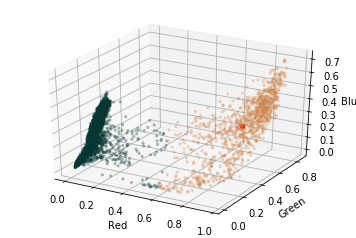

In [8]:
mykmeans_centers,clusters,error = my_kmeans(data_rescaled, 2)
print(mykmeans_centers)

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

#r, g, b = list(data_rescaled[:,0]), list(data_rescaled[:,1]), list(data_rescaled[:,2])
#axis.scatter(r, g, b, c=clusters, s=5, marker="o",cmap="rainbow")

cluster0 = data_rescaled[clusters == 0]
cluster1 = data_rescaled[clusters == 1]
axis.scatter(cluster0[:, 0], cluster0[:, 1], cluster0[:, 2], color=mykmeans_centers[0,:], marker=".", alpha=0.25)
axis.scatter(cluster1[:, 0], cluster1[:, 1], cluster1[:, 2], color=mykmeans_centers[1,:], marker=".", alpha=0.25)

axis.scatter(mykmeans_centers[0, 0], mykmeans_centers[0, 1], mykmeans_centers[0, 2], color=["yellow"], alpha=1)
axis.scatter(mykmeans_centers[1, 0], mykmeans_centers[1, 1], mykmeans_centers[1, 2], color=["red"], alpha=1)

axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")

pyplot.show()

Please note that the centroid on the left-hand side is completely obscured by the other points, but it is present. This can be confirmed by dramatically lowering the value of alpha (up to 0.03), which however makes the plot almost invisible (same happens also below).

## TO DO 3: 
Plot the value of the error versus the number of iterations

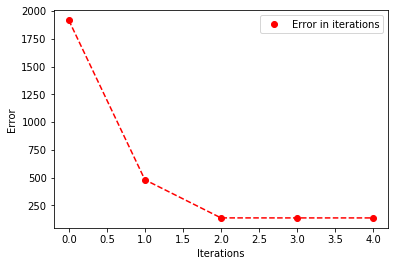

In [9]:
plt.plot(error,"ro",label="Error in iterations")
plt.plot(error,"r",linestyle="dashed")
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.legend(loc="best")

## TO DO 4:
Now use the k-means function provided in sklearn. Pass to the function the number of clusters and use multiple random initializations (n_init parameter). Go to the documentation page for further details

In [10]:
kmeans = KMeans(n_clusters=2,n_init=10)

kmeans.fit(data_rescaled)

prediction=kmeans.predict(data_rescaled)
print(kmeans.cluster_centers_)

[[0.02460889 0.2122681  0.19578944]
 [0.81952856 0.52496061 0.30703503]]


## TO DO 5:
Perform the same plot as above but with the output of the k-means function provided in sklearn.

[[0.02460889 0.2122681  0.19578944]
 [0.81952856 0.52496061 0.30703503]]


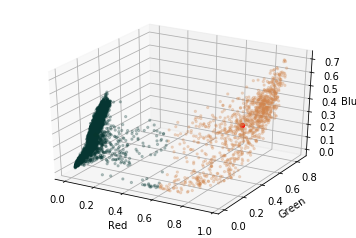

In [11]:
fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

cluster_centers = kmeans.cluster_centers_
print(cluster_centers)
#center0=kmeans.cluster_centers_[0]
#center1=kmeans.cluster_centers_[1]


cluster0 = data_rescaled[kmeans.labels_ == 0]
cluster1 = data_rescaled[kmeans.labels_ == 1]
axis.scatter(cluster0[:, 0], cluster0[:, 1], cluster0[:, 2], color=cluster_centers[0], marker=".", alpha=0.25)
axis.scatter(cluster1[:, 0], cluster1[:, 1], cluster1[:, 2], color=cluster_centers[1], marker=".", alpha=0.25)

axis.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], color=["yellow", "red"], alpha=1)

axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")

pyplot.show()

#THE CLUSTERS NEED TO BE COLORED WITH THE COORDINATES OF THE CENTROID

## Question 1: 

Compare the results obtained with your implementation and with k-means from sklearn. Do you observe any differences, i.e., do the two plot matches? 

The coordinates of the two centroids are exactly the same using my implementation and the built-in function from sklearn. Qualitatively, the two plots produced look exactly alike also in the shape of the clusters.

## TO DO 6:

Now display the segmented image based on the two clusters found above with the k-means functions by sklearn. Notice that for proper visualization you need to reshape the array back to the original 2D image size

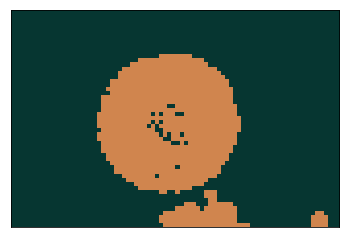

In [12]:
label = kmeans.labels_.reshape(53,80)
data_cluster = np.zeros((53,80,3))
data_cluster[label == 0] = cluster_centers[0]
data_cluster[label == 1] = cluster_centers[1]
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(data_cluster);

## Question 2: 

What do you observe? Do you think clustering could be useful for image segmentation ? And for image compression? Comment your answer.

In the picture we can see the image of the flower where the original colors have been replaced by the colors of the coordinates of the centroids found through clustering with $k=2$ (hence two colors). 

From this result, I would argue that clustering is very useful in image segmentation, as it is an intuitive and sound way to partition an image, making it easier to analyze it or store it (and we are sure to be able to achieve a converging result, while perhaps not optimal). As far as image compression is concerned, clustering seems a possibility because it definitely makes the image simpler and such that it has a lower cost of storage or transmission. However, I would guess that for optimal results the value of $k$ should be a bit higher than 2, especially considering the fact that one must be able to retrieve the starting image from its compressed form.

## TO DO 7:

Now perform again the clustering with the non-rescaled image, using the method provided by sklearn. Plot again: the 3-dimensional points, the 3-dimensional points with color based on membership, the segmented image.

(427, 640, 3)
(273280, 3)


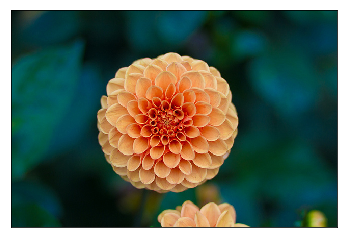

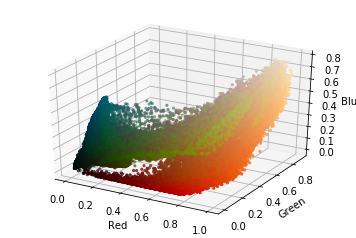

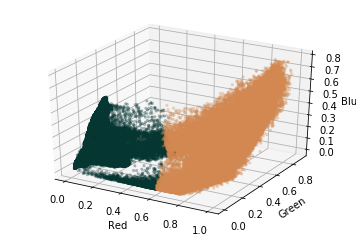

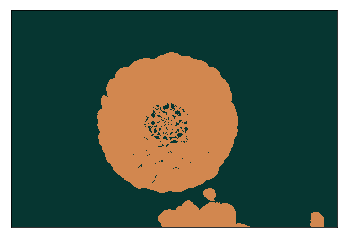

In [13]:
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);
print(flower.shape)

data = flower.reshape(flower.shape[0]*flower.shape[1], 3)
data=data/255.0
print(data.shape)


fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])


axis.scatter(r, g, b, c=data, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()


#ADD YOUR CODE HERE
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)
cluster_centers = kmeans.cluster_centers_

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
cluster0 = data[kmeans.labels_ == 0]
cluster1 = data[kmeans.labels_ == 1]

axis.scatter(cluster0[:, 0], cluster0[:, 1], cluster0[:, 2], color=cluster_centers[0], marker=".", alpha=0.25)
axis.scatter(cluster1[:, 0], cluster1[:, 1], cluster1[:, 2], color=cluster_centers[1], marker=".", alpha=0.25)
axis.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], color=["yellow", "red"], alpha=1)

axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")

pyplot.show()

label = kmeans.labels_.reshape(427,640)
data_cluster = np.zeros((427,640,3))
data_cluster[label == 0] = cluster_centers[0]
data_cluster[label == 1] = cluster_centers[1]
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(data_cluster);

## Question 3: explain what do you observe

The first image represents the original flower and the following one is its RGB plot, showing how the three colors are distributed. Then, clustering is applied to the picture and the plot shows its results: since $k=2$, we have two centroids to which two clusters are associated. The color of all points is approximated to the RGB coordinates of the two centroids, so the last image shows the result of this approximation. The flower is segmented in the two clusters and (excluding some "imperfections") its shape can still be guessed.

## TO DO 8:

Now load the landscape image (optional: try also with the skiing image), resize of a factor of 8 and segment it using kmeans with k varying from 2 to 15 clusters. You can use the sklearn implementation.

Then plot the resulting data points in the 3-dimensional space, each point must be colored based on the cluster membership. 
Additionally, plot the respective clusters centroids.



(1200, 3)


/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currentl

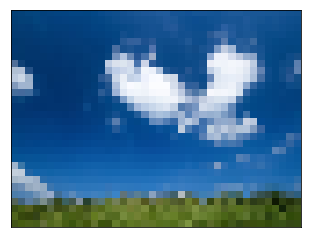

In [14]:
landscape_rescaled = rescale(landscape, 1.0 / 8.0)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(landscape_rescaled);

data_rescaled = landscape_rescaled.reshape(landscape_rescaled.shape[0]*landscape_rescaled.shape[1], 3)
print(data_rescaled.shape)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(landscape_rescaled);

********************
KMeans with k = 2 
********************


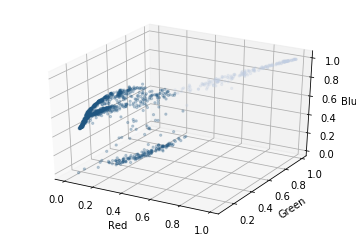

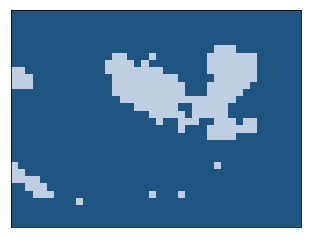

********************
KMeans with k = 3 
********************


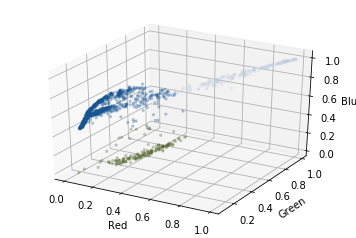

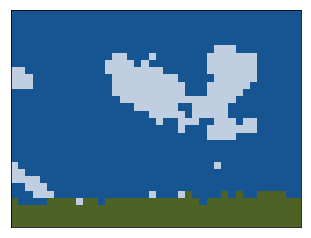

********************
KMeans with k = 4 
********************


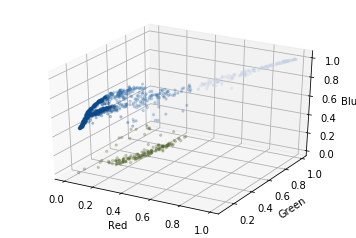

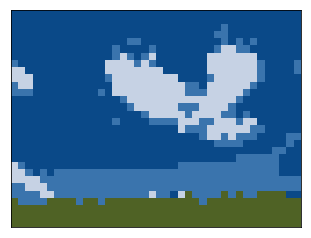

********************
KMeans with k = 5 
********************


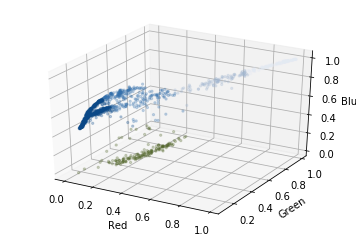

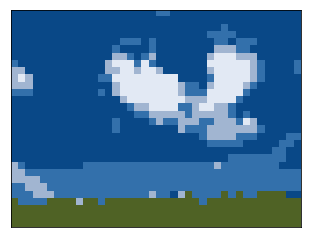

********************
KMeans with k = 6 
********************


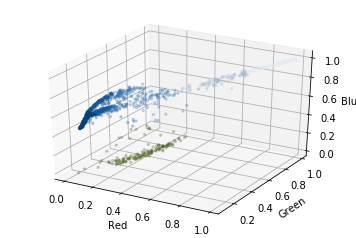

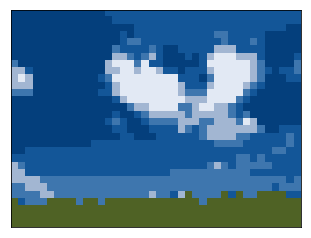

********************
KMeans with k = 7 
********************


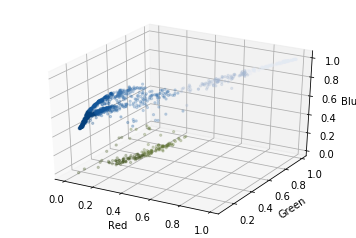

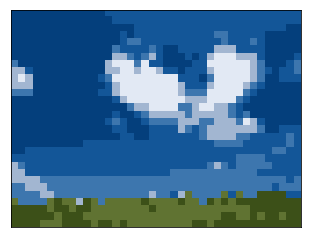

********************
KMeans with k = 8 
********************


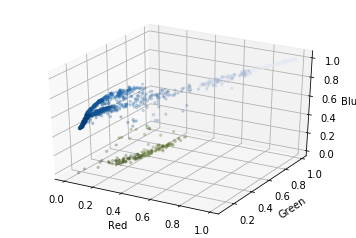

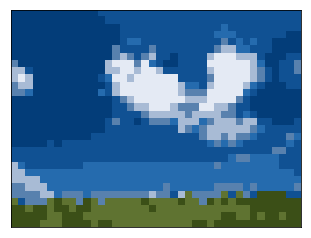

********************
KMeans with k = 9 
********************


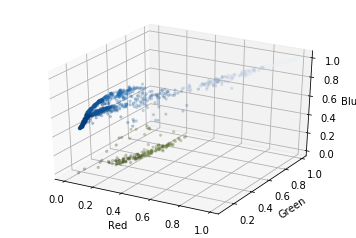

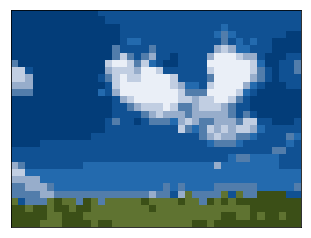

********************
KMeans with k = 10 
********************


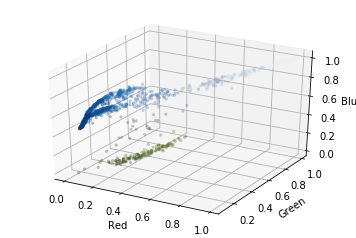

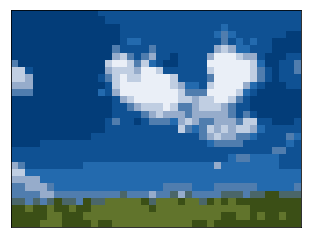

********************
KMeans with k = 11 
********************


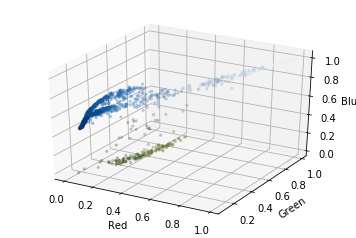

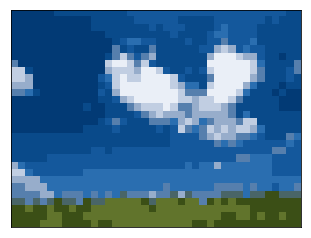

********************
KMeans with k = 12 
********************


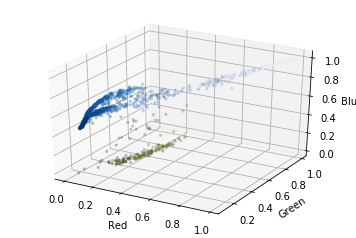

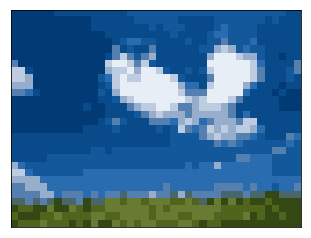

********************
KMeans with k = 13 
********************


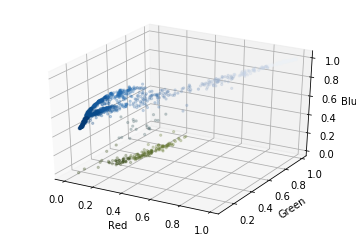

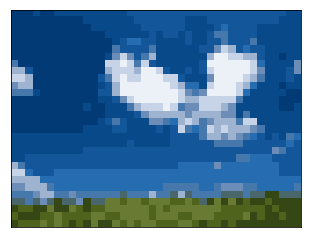

********************
KMeans with k = 14 
********************


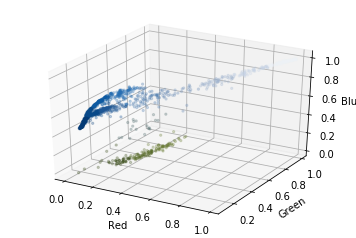

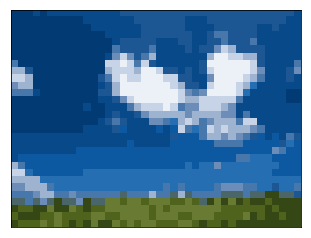

********************
KMeans with k = 15 
********************


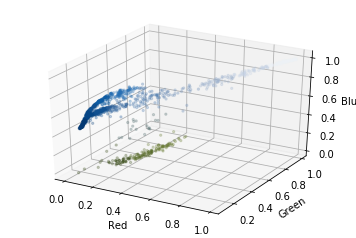

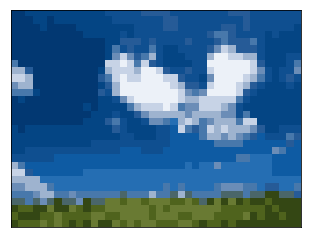

In [15]:
#ADD YOUR CODE HERE
errors = [] 
k_list = [i for i in range(2,16)]
for k in k_list:
    print(20*"*")
    print("KMeans with k = "+str(k)+" ")
    print(20*"*")
    
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(data_rescaled)
    errors.append(kmeans.inertia_)
    cluster_centers = kmeans.cluster_centers_
    
    fig = pyplot.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    for i in range(k):
        cluster = data_rescaled[kmeans.labels_ == i]
        axis.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], color=cluster_centers[i], marker=".", alpha=0.25)
   
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    pyplot.show()
    
    label = kmeans.labels_.reshape(30, 40)
    
    data_cluster = np.zeros((30,40,3))
    for i in range(k):
        data_cluster[label == i] = cluster_centers[i]
    ax = plt.axes(xticks=[], yticks=[])
    ax.imshow(data_cluster);
    
    pyplot.show()

## TO DO 9:

Plot for different values of k (e.g. k in range(2,15)) the respective error of the kmeans algorithm 

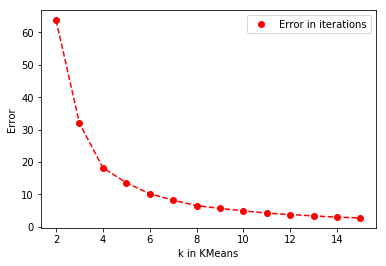

In [16]:
plt.plot(k_list,errors,"ro",label="Error in iterations")
plt.plot(k_list,errors,"r",linestyle="dashed")
plt.xlabel("k in KMeans")
plt.ylabel("Error")
plt.legend(loc="best")

A possible way to exploit the error curve in order to set the number of clusters is to apply the "Elbow rule", explained below: 

(explanation from Wikipedia)

The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data. More precisely, if one plots the percentage of variance explained by the clusters against the number of clusters, the first clusters will add much information (explain a lot of variance), but at some point the marginal gain will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion". This "elbow" cannot always be unambiguously identified. Percentage of variance explained is the ratio of the between-group variance to the total variance, also known as an F-test. A slight variation of this method plots the curvature of the within group variance.

##  Question 4:

Compare the results with different values of k, what do you observe? 

Analyze also the error, which one do you think is the optimal value of k ?

Is there a single, clear answer ? 

Which value of k would you choose by applying the "Elbow rule"? Explain why.

**ANSWERS**

We can observe that the higher $k$ becomes, the more definition the clustered image acquires; this is obvious because there will be more centroids to approximate colors to (for $k=2$ we are not even able to see the green of the grass!).

It is hard to pick ONE optimal value of $k$. Without knowing the "elbow rule" I would have guessed $k=11$, because it is indeniable that there comes a point when the error does not decrease noticeably and improvements are almost impossible to detect, even by looking at the clustered images by eye.

I do not think a univocal answer to the question above can be given, as the optimal value of $k$ is strongly purpose-dependent: it is likely that for most applications any $6 \le k \le 10$ will do the job, but it is also possible that there might be scenarioes where great precision is required and a greater $k$ must be chosen, or on the contrary other instances where one might have memory constraints and will need to make a more approximated clustering.

It seems that $k=4$ is the value which is cut off by the "elbow rule", but also $k=5$ works just as fine. By looking at the last plot, this is in fact where an angle (figuratively, the elbow) is created by the imaginary line fitting the error points as a function of the number of clusters. A further confirmation can be found also by looking directly at the clustered images: only little differences can be spotted for $k \ge 5$.

## Linkage-based clustering

The second part of the assignment concern instead linkage-based clustering. We will use the AgglomerativeClustering module of sklearn. 

In [17]:
# Import required packages
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics, datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Load sample data
data = np.load('data/circle_data.npz')
X = data['X']
labels_true = data['labels_true']

#print(X)
#print(labels_true)

## TO DO 10: 

Now exploit the AgglomerativeClustering algorithm on the provided sample data points. Use the "single" linkage type that correspond to the minimum distance criteria seen in the lectures and 2 clusters. Notice that the "single" option has been introduced recently in sklearn, if you get an error ensure you have a recent version of the library. Plot the resulting clustering.

In [18]:
# Compute Agglomerative Clustering
ac = AgglomerativeClustering(n_clusters=2, linkage="single")
    
ac.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=2,
            pooling_func='deprecated')

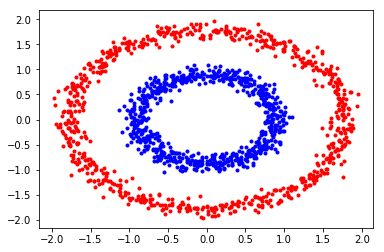

In [19]:
fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1)
cluster0 = X[ac.labels_ == 0]
cluster1 = X[ac.labels_ == 1]
axis.scatter(cluster0[:, 0], cluster0[:, 1], color="red", marker=".")
axis.scatter(cluster1[:, 0], cluster1[:, 1], color="blue", marker=".")
pyplot.show()

## TO DO 11: 

Now try the KMeans with two clusters on the same dataset we used for the AgglomerativeClustering algorithm.

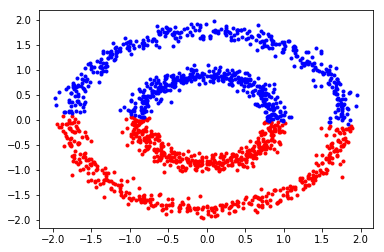

In [20]:
km = KMeans(n_clusters=2, n_init=10)
km.fit(X)

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1)
cluster0 = X[km.labels_ == 0]
cluster1 = X[km.labels_ == 1]
axis.scatter(cluster0[:, 0], cluster0[:, 1], color="red", marker=".")
axis.scatter(cluster1[:, 0], cluster1[:, 1], color="blue", marker=".")
pyplot.show()

## Question 5:

Compare the results of K-means and Agglomerative Clustering and explain what you observe



From the results we can see that while Agglomerative Clustering performs a subdivision in circular clusters, KMeans does not and it clusters the data points according to their location in the positive or negative $y$ half-plane.

This is a "textbook example" of a case in which KMeans fails. While to a human it would be natural to divide the dataset as done by AC, KMeans, which is a partitional algorithm, cannot handle sensibly the case of circular clustering, due to the fact that the mean values of the two clusters themselves are too close to each other; the result is the naïve division displayed just above. Agglomerative Clustering, on the other hand, is a hierarchical algorithm and it is therefore perfectly suited for such a case where there is a hierarchical structure that needs to be recovered.